# Вітаю на фінальному проєкті!
Протягом курсу ми навчились завантажувати дані в Python, трансформувати їх, чистити, агрегувати, знаходити з допомогою даних відповіді на наші питання, використовувати sql, а також Tableau! 
Задача фінального проєкту - продемонструвати той рівень роботи з даними, на якому Ви є зараз, показати, що Ви вмі
те робити.

## Робота з Excel файлом
Цей ноутбук буде присвячений аналізу даних з файла `Grocery DataBase.xlsx`. Так, це Excel файл, і ми можемо дуже просто завантажувати дані з нього у Python. Покажу пару команд для роботи з Excel файлом.

Для початку встановимо бібліотеку, яка потрібна для роботи з Excel файлами з pandas. Можна встановити тут, або в терміналі, але якщо Ви встановлюєте в терміналі, то після того треба перезапустити ядро (Kernel) ноутбуку, аби бібліотека точно підтягнулась. Іноді підтягується і без того, але це на випадок, що робити, якщо компілятор каже, що її не бачить.

In [1]:
!pip install openpyxl

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns
import calendar
import scipy.stats as stats
import statsmodels.stats.api as sms
from statsmodels.stats.weightstats import ztest 
import warnings

Ось так можемо переглянути, які є листки в Excel файлі:

In [3]:
path_to_file = 'data/Grocery Database.xlsx'

In [4]:
xl = pd.ExcelFile(path_to_file)
xl.sheet_names

['Grosto DB', 'Sheet2', 'Fact Summary']

А так можемо зчитати конкретний листок:

In [5]:
descr = xl.parse('Fact Summary')
display(descr)

,S.No.,Column Name,Description of the Column names
0,1,Receipt Number,Transaction Number
1,2,Date,Date of Transaction
2,3,Year,Year of Transaction
3,4,Month,Month of Transaction
4,5,Time,Time of the transaction
5,6,Mobile Number,Monbile number of the customer
6,7,Membership ID,Unique Membership ID of the Customer
7,8,Loyalty Card Points,Loyalty Points earned by customer (10 Points/1...
8,9,Age,Age of the Customer in the Company Database
9,10,Gender,Gender of the customer


Читати дані можна і з Pandas, але тут немає можливості переглянути наявні листки, а також довше відбувається читання даних.

In [6]:
df = pd.read_excel(path_to_file)

In [7]:
print(f"Набір даних містить {len(df.index)} рядків та {len(df.columns)} колонок.");

Набір даних містить 50447 рядків та 32 колонок.


In [8]:
#загальний вигляд даних
df.head()

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,...,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
0,GIJ00001,2016-01-02,2016,1,10:08:03.260000,9793548581,MIDID0001,1,36,Male,...,0.1,13.32408,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200
1,GIJ00002,2016-01-02,2016,1,15:46:50.832000,9938441276,MIDID0002,2,54,Male,...,0.1,25.26480,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240
2,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693
3,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.095,0.15,0.755,0.33440,0.5280,2.65760
4,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,2,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.120,0.15,0.730,0.52920,0.6615,3.21930


In [9]:
#бачимо, що при виведенні даних є заховані колонки, знімаємо обмеження
pd.options.display.max_columns = None

In [10]:
#обмежимо знаки після коми до 2-х
df = df.round(2)
df.head()

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,City,Country,Category,Sub_Category,Items,Brand,Description,Price,QTY,DISC,Amount,Net Bill Amount,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
0,GIJ00001,2016-01-02,2016,1,10:08:03.260000,9793548581,MIDID0001,1,36,Male,Jakarta,Indonesia,"Choco, Snacks, Sweets",Biscuits & Crackers,Oreo mini oreo sharepack,Oreo,540 g,3.09,4,0.02,12.11,12.11,0.1,13.32,Card,Enterprise Bank,0.15,0.15,0.70,1.85,1.85,8.65
1,GIJ00002,2016-01-02,2016,1,15:46:50.832000,9938441276,MIDID0002,2,54,Male,Jakarta,Indonesia,"Wines, Beers & Spirits",Beer,Ashai Lager Beer,Ashai,480 ml,11.60,2,0.01,22.97,22.97,0.1,25.26,Card,Philippine Veterans Bank,0.12,0.15,0.73,2.74,3.48,16.98
2,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Frozen Fruits,Cascadian farm organic strawberries,Cascadiam Farm,1 Kg,13.31,1,0.01,13.18,38.35,0.1,42.19,Cash,BDO Unibank,0.15,0.15,0.70,1.96,2.00,9.36
3,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Fresh Vegetables,Oraganic 4 Life Red onions,Organic 4 Life,270 g,3.52,1,0.01,3.48,38.35,0.1,42.19,Cash,BDO Unibank,0.10,0.15,0.76,0.33,0.53,2.66
4,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,2,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Lettuce & Salads,LIVEWELL Italian mesclun salad,LIVEWELL,570 g,4.41,1,0.01,4.37,38.35,0.1,42.19,Cash,BDO Unibank,0.12,0.15,0.73,0.53,0.66,3.22


In [11]:
#перевіримо типи даних
df.dtypes 

Receipt Number                 object
Date                   datetime64[ns]
Year                            int64
Month                           int64
Time                           object
Mobile Number                   int64
Membership ID                  object
Loyalty Card Points             int64
Age                             int64
Gender                         object
City                           object
Country                        object
Category                       object
Sub_Category                   object
Items                          object
Brand                          object
Description                    object
Price                         float64
QTY                             int64
DISC                          float64
Amount                        float64
Net Bill Amount               float64
GST                           float64
Gross Bill Amount             float64
Payment Mode                   object
Bank Name                      object
% Profit Mar

In [12]:
#перевіримо на порожні значення
df.isnull().sum() 

Receipt Number         0
Date                   0
Year                   0
Month                  0
Time                   0
Mobile Number          0
Membership ID          0
Loyalty Card Points    0
Age                    0
Gender                 0
City                   0
Country                0
Category               0
Sub_Category           0
Items                  0
Brand                  0
Description            0
Price                  0
QTY                    0
DISC                   0
Amount                 0
Net Bill Amount        0
GST                    0
Gross Bill Amount      0
Payment Mode           0
Bank Name              0
% Profit Margin        0
% Operating Cost       0
% Product Cost         0
Profit Margin          0
Operating Cost         0
Product Cost           0
dtype: int64

In [13]:
#перевіримо дані на дублювання
df[df.duplicated()]

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,City,Country,Category,Sub_Category,Items,Brand,Description,Price,QTY,DISC,Amount,Net Bill Amount,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
32664,GSB00094,2016-02-12,2016,2,14:01:00.088000,9853108031,MIDSG0091,2,60,Female,Bedok,Singapore,"Choco, Snacks, Sweets",snacks,Tostitos medium chunky salsa,Tostitos,270 g,4.14,1,0.05,3.93,7.87,0.07,8.42,Cash,ING Bank,0.09,0.15,0.76,0.39,0.62,3.13


In [14]:
#перевіримо продублюваний рядок
df[df['Receipt Number'] == "GSB00094"].iloc[0:5, 10:25]

,City,Country,Category,Sub_Category,Items,Brand,Description,Price,QTY,DISC,Amount,Net Bill Amount,GST,Gross Bill Amount,Payment Mode
32663,Bedok,Singapore,"Choco, Snacks, Sweets",snacks,Tostitos medium chunky salsa,Tostitos,270 g,4.14,1,0.05,3.93,7.87,0.07,8.42,Cash
32664,Bedok,Singapore,"Choco, Snacks, Sweets",snacks,Tostitos medium chunky salsa,Tostitos,270 g,4.14,1,0.05,3.93,7.87,0.07,8.42,Cash


Це два однакових товари в одній транзакції, Net Bill Amount розрахований для 2 товарів - тому не вважаємо це дублюванням та не видаляємо

In [15]:
# вимкнемо повідомлення про попередження
warnings.filterwarnings("ignore")

## 1. Які країни та міста дають найбільше прибутку?

In [16]:
df.groupby(['Country', 'City'])['Profit Margin'].sum().sort_values(ascending=False)


Country      City        
Singapore    Bedok           14649.04
Philippines  Manila          14454.95
Malaysia     Kuala Lumpur    12957.65
Indonesia    Jakarta         11068.78
Singapore    Woodlands        7489.07
Name: Profit Margin, dtype: float64

Найбільше прибутку дають міста Bedok та  Manila; країни - Singapore та Philippines 

## 2. Чи в динаміці росте прибуток по кожній із країн продажу?

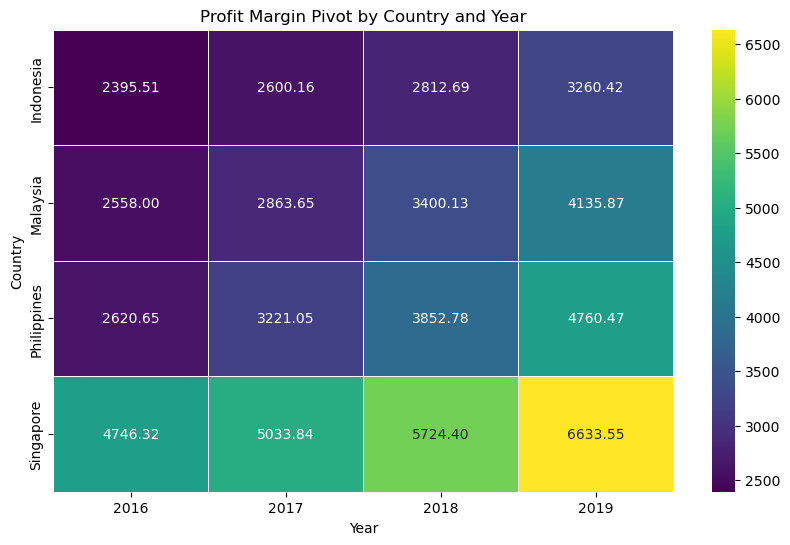

In [17]:
profit_margin_pivot = df.pivot_table(index='Year', columns='Country', values='Profit Margin', aggfunc='sum')

plt.figure(figsize=(10, 6))
sns.heatmap(profit_margin_pivot.T, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)

plt.title('Profit Margin Pivot by Country and Year')
plt.xlabel('Year')
plt.ylabel('Country')

plt.show()

Кожна із країн у динаміці показує ріст прибутку.

## 3. Покупці якої статі мають вищий середній чек у різних містах?

In [18]:
gender_category_pivot = df.pivot_table(index='City', columns='Gender', values='Gross Bill Amount', aggfunc='mean').round(2)

gender_category_pivot.style.background_gradient(axis=1)

Gender,Female,Male
City,,
Bedok,70.670000,68.870000
Jakarta,74.410000,74.570000
Kuala Lumpur,72.300000,69.700000
Manila,73.450000,68.700000
Woodlands,74.530000,72.100000


У переважній більшості категорій товарів жінки мають вищий середній чек. У своїх маркетингових кампаніях маємо орієнтуватися більше на жінок.

## 4. Проаналізуємо, покупці якої статі та вікової групи приносять найбільше прибутку

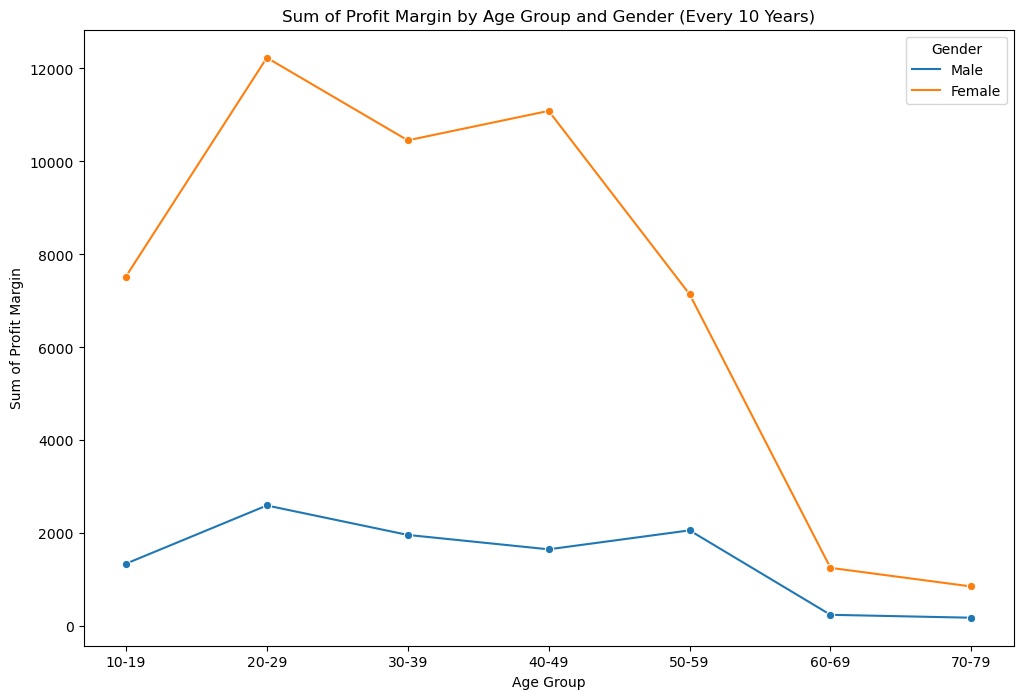

In [19]:
age_bins = np.arange(0, df['Age'].max() + 10, 10)
age_labels = [f'{start}-{start + 9}' for start in age_bins[:-1]]
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Age Group', y='Profit Margin', hue='Gender', estimator='sum', ci=None, marker='o')

plt.title('Sum of Profit Margin by Age Group and Gender (Every 10 Years)')
plt.xlabel('Age Group')
plt.ylabel('Sum of Profit Margin')
plt.legend(title='Gender')

plt.show()

Жінки у кілька раз більше формують прибутку наших магазинів. Оскільки середній чек чоловіків та жінок так сильно відрізняється, можемо зробити висновок, що жінки або обирають більш прибуткові товари, або значно частіше відвідують магазини. Найбільше прибутку отримуємо від жінок віком від 20-ти до 49 років.

## 5. Перевіримо гіпотезу про те, що жінки значно частіше роблять покупки в наших магазинах

In [20]:
gender_category_pivot = df.groupby(['City', 'Gender'])['Receipt Number'].nunique().unstack()

gender_category_pivot

Gender,Female,Male
City,,
Bedok,2846,318
Jakarta,1950,469
Kuala Lumpur,2134,702
Manila,2391,703
Woodlands,1467,68


Так, жінки значно частіше відвідують магазини у всіх містах.

## 6. Чи є сезонність у продажах?

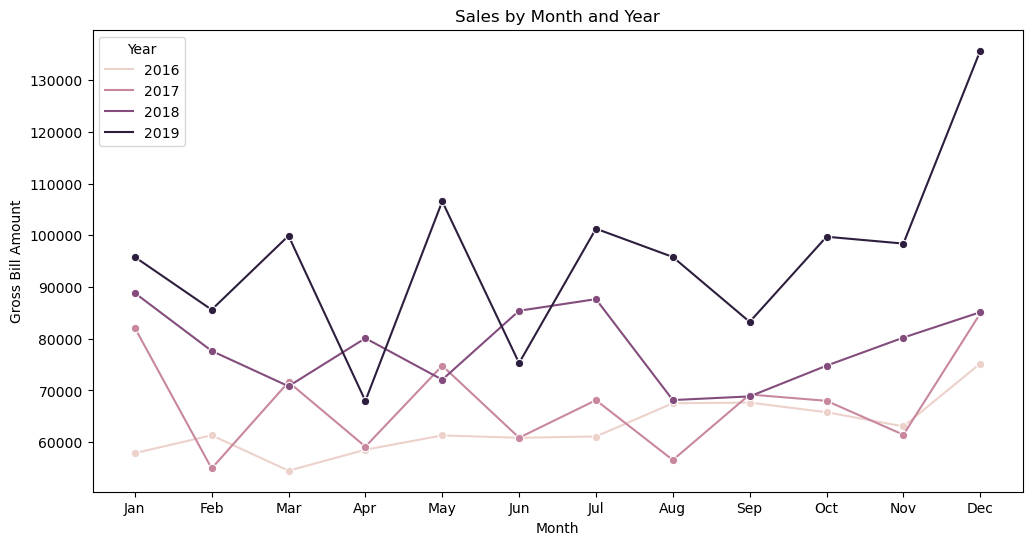

In [21]:
sales_by_month_year = df.groupby(['Year', 'Month'])['Gross Bill Amount'].sum()
sales_by_month_year_df = sales_by_month_year.reset_index()
sales_by_month_year_df['Month'] = sales_by_month_year_df['Month'].apply(lambda x: calendar.month_abbr[x])

plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_by_month_year_df, x='Month', y='Gross Bill Amount', hue='Year', marker='o')

plt.title('Sales by Month and Year')
plt.xlabel('Month')
plt.ylabel('Gross Bill Amount')
plt.legend(title='Year')

plt.show()

Щороку є чітке зростання продаж у грудні, що може бути повʼязане із підготовкою до новорічно-різдвяних свят. Пропонуємо активно вести рекламні кампанії з кінця листопада та мати достатню кількість товарів у наявності.

## 7. У які години здійснюється найбльше покупок?

In [25]:
df['Hour'] = df['Time'].apply(lambda x: x.hour)

count_unique_receipts_by_hour = df.groupby('Hour')['Receipt Number'].nunique()

count_unique_receipts_by_hour = count_unique_receipts_by_hour.reset_index()
count_unique_receipts_by_hour.columns = ['Hour', 'Number of Unique Receipts']

count_unique_receipts_by_hour.style.background_gradient(subset=['Number of Unique Receipts'])

,Hour,Number of Unique Receipts
0,10,1109
1,11,1049
2,12,1106
3,13,1153
4,14,1075
5,15,1112
6,16,1088
7,17,1071
8,18,1099
9,19,1123


Найбільше покупок здійснюється о 13ій годині та о 20ій годині, що швидше за все є часом обідньої перерви та завершенням робочої зміни відповідно. 

## 8. Знайдемо найбільш прибуткову категорію товарів

In [26]:
profit_margin_by_category = df.groupby('Category')['Profit Margin'].sum().sort_values(ascending=False)

max_profitable_category = profit_margin_by_category.idxmax()

print(profit_margin_by_category)
print(f"Найбільш прибутковою категорією товарів є {max_profitable_category}");

Category
Frozen                       9262.12
Beauty                       7990.07
Bakery & Breakfast           6224.32
Pet Care                     4460.11
Fruit & Vegetable            4387.40
Mother & Baby                4261.56
Meat & Seafood               4166.65
Wines, Beers & Spirits       3655.00
Choco, Snacks, Sweets        2957.12
Dairy, Chilled & Eggs        2668.36
Beverages                    2409.58
Household                    1868.11
Health                       1775.57
Party Supplies               1655.12
Kitchen & Dining             1611.84
Rice & Cooking Essentials    1266.56
Name: Profit Margin, dtype: float64
Найбільш прибутковою категорією товарів є Frozen


## 9. Проаналізуємо структуру категорій товарів за прибутковістю для підприємства. 

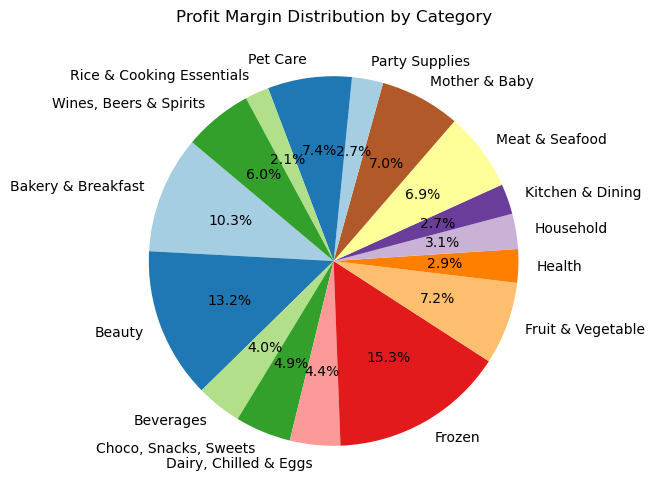

In [27]:
pivot_table = df.pivot_table(index='Category', values='Profit Margin', aggfunc='sum')

plt.figure(figsize=(6, 6))
plt.pie(pivot_table['Profit Margin'], labels=pivot_table.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Profit Margin Distribution by Category')

plt.show()

Найбільшу частку прибутку приносять категорії Frozen, Beauty i Bakery & Breakfast, даючи в сукупності 38.8% прибутку

## 10. Виділимо у найприбутковішій категорії найбільш прибуткову підкатегорію товарів

In [28]:
profit_margin_frozen_subcategory = df[df['Category'] == 'Frozen'].groupby('Sub_Category')['Profit Margin'].sum().sort_values(ascending=False)

max_profitable_frozen_subcategory = profit_margin_frozen_subcategory.idxmax()

print(profit_margin_frozen_subcategory)
print(f"Найбільш прибутковою категорією товарів є {max_profitable_frozen_subcategory}. Тому важливо завжди мати у наявності в асортименті продукти цієї категорії");

Sub_Category
Frozen Seafood       3242.88
Frozen Meat          1587.25
Frozen Vegetables    1570.54
Bread & Pasteries    1436.86
Frozen Fruits         738.76
Ice Cream             685.83
Name: Profit Margin, dtype: float64
Найбільш прибутковою категорією товарів є Frozen Seafood. Тому важливо завжди мати у наявності в асортименті продукти цієї категорії


## 11. За рахунок чого найбільш прибуткова категорія дає найбільше прибутку?

In [29]:
avg_profit_margin_by_category = df.pivot_table(values=['Price','% Profit Margin','Gross Bill Amount'], index=['Category'], aggfunc='mean').round(2)
avg_profit_margin_by_category

,% Profit Margin,Gross Bill Amount,Price
Category,,,
Bakery & Breakfast,0.11,69.46,5.22
Beauty,0.10,80.74,10.06
Beverages,0.09,75.93,8.30
"Choco, Snacks, Sweets",0.11,61.84,5.77
"Dairy, Chilled & Eggs",0.07,62.06,6.90
Frozen,0.12,79.99,7.69
Fruit & Vegetable,0.11,75.37,5.57
Health,0.08,85.95,13.69
Household,0.07,78.41,8.86


Категорія Frozen має один з найвищих рівнів прибутковості поруч із високим середнім чеком, що сумарно дає найвищий обсяг прибутку порівняно із іншими категоріями товарів, незважаючи на те, що середня ціна товарів у цій катеогрії не є високою порівняно із іншими категоріями.Для того щоб збільшити обсяги прибутку компанії необхідно у інших категоріях або підвищити відсоток маржинальності, або підвищити середній чек, або досягти обох цілей одночасно.


## 12. Яким методом оплати покупці у різних країнах роблять покупки на більші чеки?

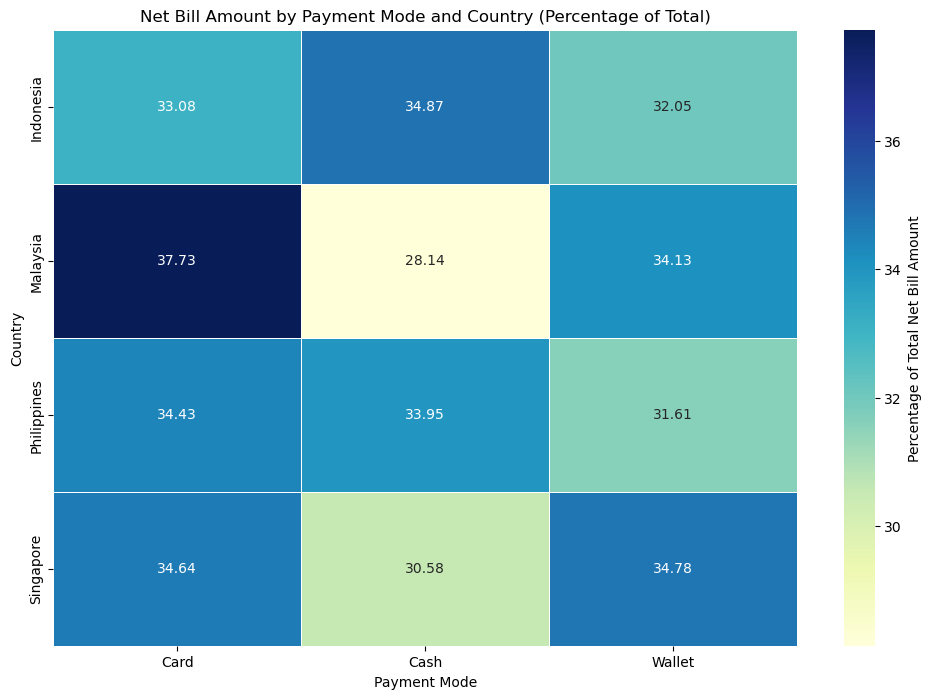

In [30]:
pivot_table = df.pivot_table(values='Net Bill Amount', index=['Country'], columns=['Payment Mode'], aggfunc='sum')

pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_percentage, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5, cbar_kws={"label": "Percentage of Total Net Bill Amount"})
plt.title('Net Bill Amount by Payment Mode and Country (Percentage of Total)')

plt.show()

У Малайзії та на Філіпінах переважає метод оплати картою, у Сінгапурі майже рівні частки займають картка та електронний гаманець, в той час, як у Індонезії найпопулярніший метод оплати - готівка


## 13. Перевіримо за допомогою z-test чи є статистично значущою різниця в оплаті карткою та електронним гаманцем

In [31]:
net_bill_wallet = df[df['Payment Mode'] == 'Wallet']['Net Bill Amount']
net_bill_card = df[df['Payment Mode'] == 'Card']['Net Bill Amount']

z_statistic, p_value = ztest(net_bill_wallet, net_bill_card)

print(f'Z-statistic: {z_statistic:.4f}')
print(f'P-value: {p_value:.4f}')

alpha = 0.05
if p_value < alpha:
    print('Різниця в оплаті карткою та електронним гаманцем є статистично значущою')
else:
    print('Різниця в оплаті карткою та електронним гаманцем не є статистично значущою')

Z-statistic: -3.9887
P-value: 0.0001
Різниця в оплаті карткою та електронним гаманцем є статистично значущою


## 14. Перевіримо за допомогою z-test чи є статистично значущою різниця в оплаті карткою та електронним гаманцем в Сингапурі

In [32]:
net_bill_wallet_singapore = df[(df['Payment Mode'] == 'Wallet') & (df['Country'] == 'Singapore')]['Net Bill Amount']
net_bill_card_singapore = df[(df['Payment Mode'] == 'Card') & (df['Country'] == 'Singapore')]['Net Bill Amount']

z_statistic, p_value = ztest(net_bill_wallet_singapore, net_bill_card_singapore)

print(f'Z-statistic: {z_statistic:.4f}')
print(f'P-value: {p_value:.4f}')

alpha = 0.05
if p_value < alpha:
    print('Різниця в оплаті карткою та електронним гаманцем в Сингапурі є статистично значущою')
else:
    print('Різниця в оплаті карткою та електронним гаманцем в Сингапурі не є статистично значущою')

Z-statistic: 1.2988
P-value: 0.1940
Різниця в оплаті карткою та електронним гаманцем в Сингапурі не є статистично значущою


## Посилання на дашборд
https://public.tableau.com/app/profile/mariana.shchehelska/viz/GrocerySalesAnalysis2016-2019/GrocerySalesAnalysis2016-2019?publish=yes

В файлі ви знайдете опис колонок і значення.   

**Задача**: Уявіть, що Вам дали цей набір даних з питанням "Що корисного ми можемо з них взяти для розвитку нашого бізнесу?". То Вам необхідно розказати бізнесу історію про ці дані у форматі
1. питання, яке Вас цікавить щодо цих даних як співробітника цього бізнесу, який дуже вболіває за його успіх, 
2. код для відповіді на це питання
3. висновки, які Ви зробили з огляду на результат виконання коду: які рішення ми можемо прийняти щодо подальших кроків в аналізі або які рекомендації Ви б дали бізнесу виходячи з результатів.

**Необхідно** 

1. поставити до даних _мінімум_ 10 бізнес-питань, при цьому зробивши   
- початковий аналіз даних: їх розмір, структура, наявність пропущених значень та що з ними зробити, зміна типів даних там, де це доречно зробити (наприклад, якщо колонка завантажилась як тип string, а з опису видно, що там має бути float - варто змінити тип) - ця частина не входить у бізнес-питання, але є необхідною при аналізі даних.  
- _мінімум_ 1 зведеної таблиці (pivot) або її аналога
- _мінімум_ 5 візуалізацій, 3 з яких мають різний тип (наприклад, scatter plot, line plot, pair plot)
- _мінімум_ 1 використання тестування статистичних гіпотез. Наприклад, порівняти, чи стат значимо відрізняється певний цікавий бізнесу показник для чоловіків і жінок. Важливо, що найбільш доречно це буде, якщо той показник, який порівнюємо між групами, справді має доволі незначну різницю. Але потренуватись можна і при наявності значної. Питання тут насправді що таке "значна")) І воно залежить від співвідношення розміру середнього і стандартного відхилення.

    В даному мінімум-наборі немає вимоги на використання SQL. Але якщо Вам хочеться потренуватись, то Ви можете це зробити скориставшись pandasql. 

    Питанням може бути як "Яка є кількість унікальних чеків в цьому наборі даних?" так і щось значно складніше. Якщо у Вас складне питання, і аби відповісти на нього Ви мали відповісти на 3 менших питання (зробити якісь трансформації над даними, подивитись щось), то це рахується як 3 питання з 10 необхідних у завданні. Звісно ж Ви можете зробити більше за встановлений мінімум - все буде перевірено :)

2. Розробити систему метрик для цього бізнесу (що нам цікаво вимірювати) і побудувати Tableau репорт відповідно до системи метрик. Опублікувати Tableau репорт на Tableau public і додати посилання на нього в ноутбуці з описом на кшталт "Візуалізацію у вигляді інтерактивного репорту даних можна знайти за посиланням".

По закінченню - завантажте ноутбук на git і додаємо посилання на ноутбук в здачу роботи в Kwiga. 
До речі, з часом, Вам може захотітись доповнити цей ноутбук, коли арсенал Ваших навичок по роботі з даними розшириться. І це буде чудова ідея!

**Успіхів!**